In [3]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')
# Defining a 2x3 matrix (transformation from R2 to R3)
A = np.array([[1, 2], [0, 1], [1, 0]])

# Singular Value Decomposition
U, S, VT = np.linalg.svd(A)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


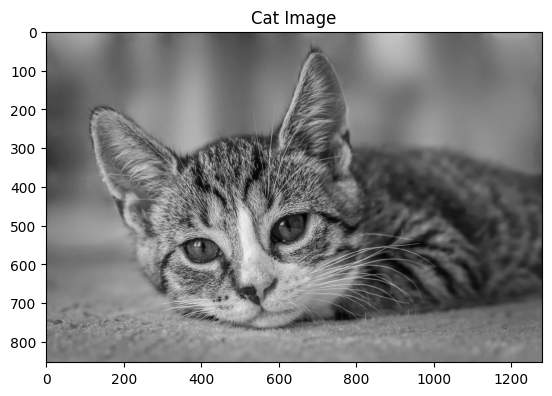

In [4]:
import cv2

image = cv2.imread('/content/drive/MyDrive/cat.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Cat Image')
plt.show()

In [5]:
U, S, Vt = np.linalg.svd(image, full_matrices=False)
U.shape, S.shape, Vt.shape

((853, 853), (853,), (853, 1280))

In [6]:
# First and last 10 singular values
S[:10], S[-10:]

(array([121231.70904121,  21507.74735712,  11022.82732921,   9667.96088725,
          7974.87426947,   7845.7864318 ,   6891.39312659,   6065.70966684,
          5920.7358676 ,   5152.96910182]),
 array([3.47437995, 3.35485355, 3.32677307, 3.28951795, 3.22630161,
        3.1979452 , 3.08146057, 3.02375588, 2.9407043 , 2.86578733]))

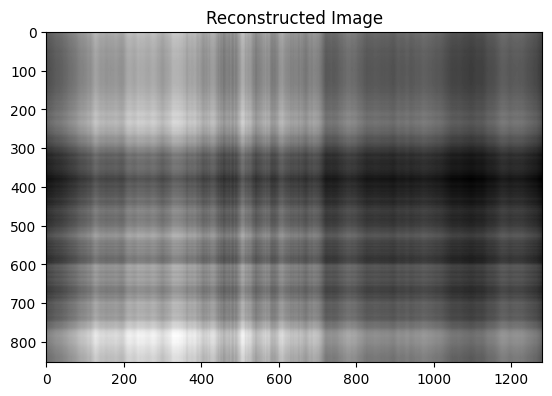

In [7]:
reconstructed_image = np.matrix(U[:,:1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:])
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

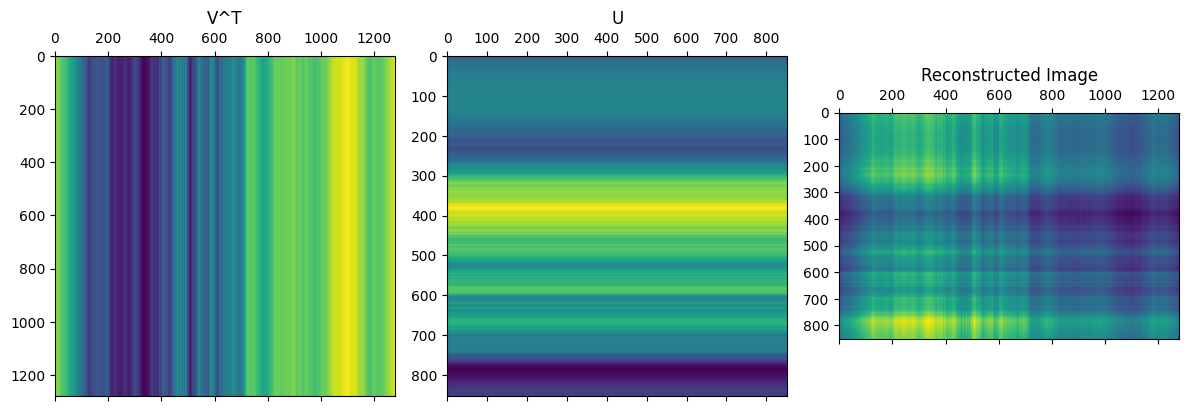

In [8]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131)
ax1.matshow(-np.ones_like(np.matrix(Vt[:1,:])).T * np.matrix(Vt[:1,:]))
ax1.set_title('V^T')

ax2 = fig.add_subplot(132)
ax2.matshow(-(np.ones_like(np.matrix(U[:,:1])) * np.matrix(U[:,:1]).T).T)
ax2.set_title('U')

ax3 = fig.add_subplot(133)
ax3.matshow(reconstructed_image)
ax3.set_title('Reconstructed Image')

plt.tight_layout()
plt.show()

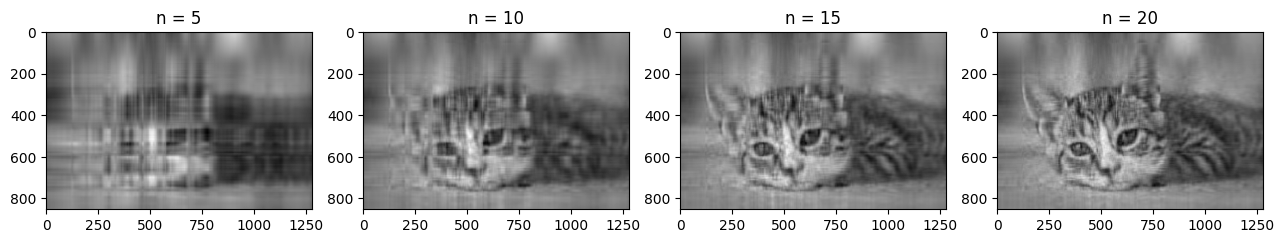

In [9]:
plt.figure(figsize=(16,4))

start, end, step = 5, 25, 5
for i in range(start, end, step):
    plt.subplot(1, (end - start) // step + 1, (i - start) // step + 1)
    reconstructed = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(reconstructed, cmap='gray')
    plt.title('n = %s' % i)

plt.tight_layout()
plt.show()

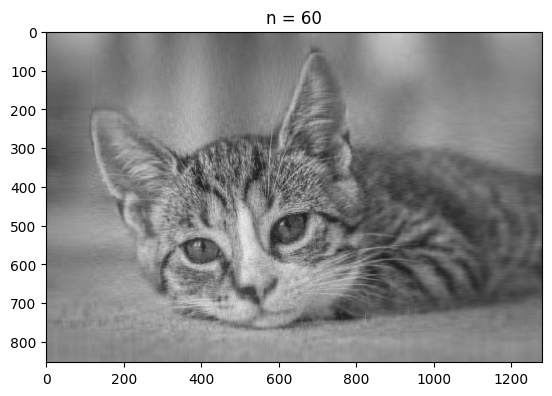

In [10]:
n = 60
reconstructed = np.matrix(U[:, :n]) * np.diag(S[:n]) * np.matrix(Vt[:n, :])
plt.imshow(reconstructed, cmap='gray')
plt.title('n = %s' % n)
plt.show()

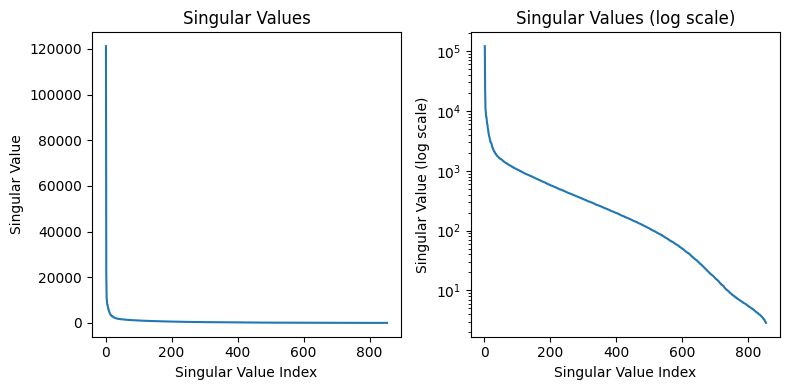

In [11]:
# Plotting the singular values
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(S) + 1), S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(S) + 1), S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Values (log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()